In [38]:
import pandas as pd
import datetime

In [39]:
date = datetime.datetime.date(datetime.datetime.now())

In [40]:
today = f"{str(date.day)}-{str(date.month)}-{str(date.year)}"

In [41]:
df = pd.read_csv('./results/hackerRank_at-'+today+".csv")

In [42]:
df.columns

Index(['Unnamed: 0', 'username', 'oneStarBadge', 'twoStarBadge',
       'threeStarBadge', 'fourStarBadge', 'fiveStarBadge', 'basic_Certificate',
       'intermediate_Certificate', 'adavanced_Certificate'],
      dtype='object')

In [43]:
df.describe()

,Unnamed: 0,oneStarBadge,twoStarBadge,threeStarBadge,fourStarBadge,fiveStarBadge,basic_Certificate,intermediate_Certificate,adavanced_Certificate
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,402.000000,0.228571,0.247205,0.247205,0.228571,0.243478,0.484472,0.021118,0.008696
std,232.527776,0.546293,0.498513,0.536951,0.508562,0.496603,0.920372,0.143867,0.092902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,804.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,1.000000,1.000000


In [44]:
BadgeCount = {
    "NumberOfoneStarBadge": int(df['oneStarBadge'].sum()),
    "NumberOftwoStarBadge": int(df['twoStarBadge'].sum()),
    "NumberOfthreeStarBadge": int(df['threeStarBadge'].sum()),
    "NumberOffourStarBadge": int(df['fourStarBadge'].sum()),
    "NumberOffiveStarBadge": int(df['fiveStarBadge'].sum()),
    "NumberOfbasic_Certificate": int(df['basic_Certificate'].sum()),
    "NumberOfintermediate_Certificate": int(df['intermediate_Certificate'].sum()),
    "NumberOfadavanced_Certificate": int(df['adavanced_Certificate'].sum())
}


In [45]:
BadgeCount

{'NumberOfoneStarBadge': 184,
 'NumberOftwoStarBadge': 199,
 'NumberOfthreeStarBadge': 199,
 'NumberOffourStarBadge': 184,
 'NumberOffiveStarBadge': 196,
 'NumberOfbasic_Certificate': 390,
 'NumberOfintermediate_Certificate': 17,
 'NumberOfadavanced_Certificate': 7}

In [46]:
import matplotlib.pyplot as plt

In [61]:
teal_palette = [
          '#e0f5f8',
          '#b8e4e5',
          '#90d3d4',
          '#68c2c3',
          '#40b1b2',
        ]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=teal_palette[::-1])

In [62]:
badge_labels = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
badge_values = [
    BadgeCount["NumberOfoneStarBadge"],
    BadgeCount["NumberOftwoStarBadge"],
    BadgeCount["NumberOfthreeStarBadge"],
    BadgeCount["NumberOffourStarBadge"],
    BadgeCount["NumberOffiveStarBadge"]
]

certificate_labels = ['Basic', 'Intermediate', 'Advanced']
certificate_values = [
    BadgeCount["NumberOfbasic_Certificate"],
    BadgeCount["NumberOfintermediate_Certificate"],
    BadgeCount["NumberOfadavanced_Certificate"]
]

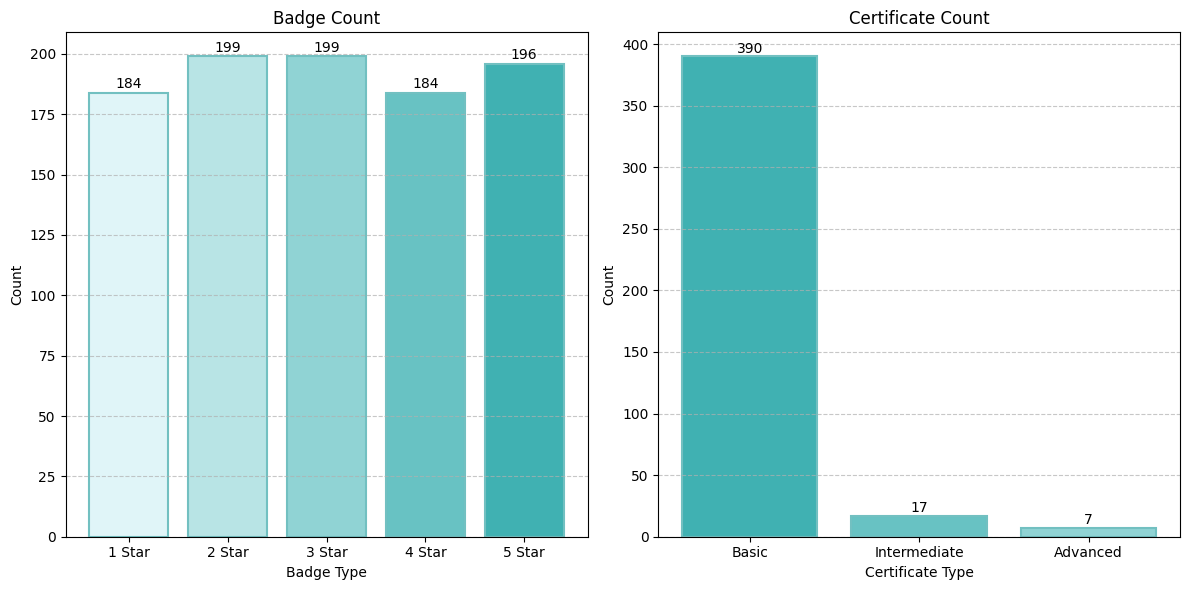

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(badge_labels, badge_values,
                color=teal_palette, edgecolor='#72c0c1', linewidth=1.5)
plt.title('Badge Count')
plt.xlabel('Badge Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
bars = plt.bar(certificate_labels, certificate_values, 
               color=teal_palette[::-1], edgecolor='#72c0c1', linewidth=1.5)
plt.title('Certificate Count')
plt.xlabel('Certificate Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()